In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from seaborn import plt

In [55]:
%matplotlib inline

In [56]:
whales08 = pd.read_csv('seamap1065_names_2008.csv', index_col=0)
whales08.head()

,row_id,latitude,longitude,sp_code,scientific,common,tsn,count,series_id,obs_date,date_time,last_mod,provider,owner,oceano,depth,ds_type,platform
dataset_id,,,,,,,,,,,,,,,,,,
1065,1065_18862,37.22,-126.68,MA,Mirounga angustirostris,Northern Elephant Seal,180672,1,NaN,10/20/08,10/20/08 8:56,11/26/13 12:19,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":0.7100,""CHL_M"":0.4900,""CHL_Y"":0.4500,""...",NaN,ptobs,boat
1065,1065_18863,37.22,-126.69,MA,Mirounga angustirostris,Northern Elephant Seal,180672,1,NaN,10/20/08,10/20/08 9:00,11/26/13 12:19,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":0.7100,""CHL_M"":0.4900,""CHL_Y"":0.4500,""...",NaN,ptobs,boat
1065,1065_18864,37.23,-126.74,177,Cetacea,cetaceans,180403,155,NaN,10/20/08,10/20/08 9:16,11/26/13 12:19,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":0.7100,""CHL_M"":0.4900,""CHL_Y"":0.4500,""...",NaN,ptobs,boat
1065,1065_18865,37.24,-126.79,CU,Callorhinus ursinus,Northern Fur Seal,180627,1,NaN,10/20/08,10/20/08 9:30,11/26/13 12:19,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":0.5500,""CHL_M"":0.4200,""CHL_Y"":0.4300,""...",NaN,ptobs,boat
1065,1065_18866,37.28,-126.98,MA,Mirounga angustirostris,Northern Elephant Seal,180672,1,NaN,10/20/08,10/20/08 10:24,11/26/13 12:19,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":0.4600,""CHL_M"":0.4000,""CHL_Y"":0.3900,""...",NaN,ptobs,boat


In [8]:
whales08.describe()

,latitude,longitude,tsn,count,series_id,depth
count,903.000000,903.000000,903.000000,890.000000,0,0
mean,37.612182,-124.217276,184673.595792,34.061798,NaN,NaN
std,4.473932,2.958823,39279.578292,125.403069,NaN,NaN
min,30.280000,-131.000000,180403.000000,1.000000,NaN,NaN
25%,33.970000,-126.070000,180438.000000,1.000000,NaN,NaN
50%,36.970000,-124.550000,180523.000000,2.000000,NaN,NaN
75%,40.815000,-122.295000,180627.000000,10.000000,NaN,NaN
max,48.340000,-117.300000,555654.000000,2056.000000,NaN,NaN


In [10]:
len(whales08)

903

In [35]:
plt.scatter?

In [37]:
print common

['Northern Elephant Seal' 'cetaceans' 'Northern Fur Seal' 'baleen whales'
 'goose-beaked whales' 'eared seals' 'Short-beaked Common Dolphin'
 'Striped Dolphin' 'Blue Whale' "Risso's Dolphin" "Dall's Porpoise"
 'Fin Whale' "Baird's Beaked Whale" 'Northern Right Whale Dolphin'
 "Cuvier's Beaked Whale" 'Sei Whale' 'Sperm Whale'
 'Pacific White-sided Dolphin' 'Killer Whale' 'pygmy sperm whales'
 'Humpback Whale' 'Harbor Porpoise' 'California Sealion'
 'Bottlenose Dolphin' 'common dolphins' 'Long-beaked Common Dolphin'
 'Short-finned Pilot Whale' 'Common Minke Whale' 'beaked whales']


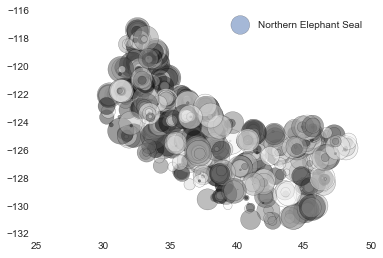

In [57]:
# playing around with scatterplots

x = whales08.latitude
y = whales08.longitude
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2 # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.legend(common)

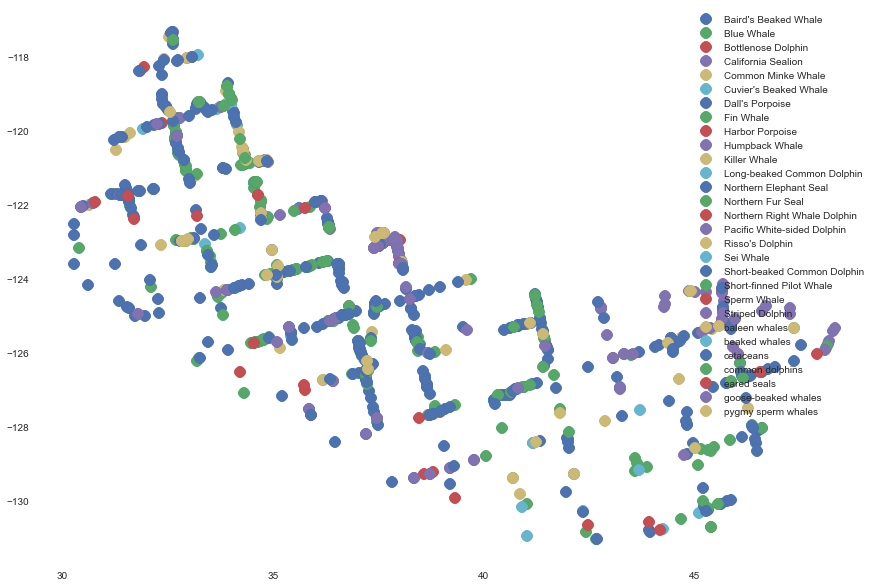

In [85]:
num = len(whales08['common'])
x = whales08.latitude
y = whales08.longitude
labels = whales08.common
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')
sns.set_context(rc={"figure.figsize": (15, 10)})


fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
plt.legend(ax.get_legend_handles_labels()[1], loc="center")
ax.legend()

plt.show()


In [48]:
ax.plot?

### KNN Learning from Whale Cruise in 2008

In [117]:
#edited dataframe

whales08_clean = whales08[['latitude', 'longitude', 'common']]
whales08_clean.head()

,latitude,longitude,common
dataset_id,,,
1065,37.22,-126.68,Northern Elephant Seal
1065,37.22,-126.69,Northern Elephant Seal
1065,37.23,-126.74,cetaceans
1065,37.24,-126.79,Northern Fur Seal
1065,37.28,-126.98,Northern Elephant Seal


In [95]:
whales08_clean.describe()

,latitude,longitude,count
count,903.000000,903.000000,890.000000
mean,37.612182,-124.217276,34.061798
std,4.473932,2.958823,125.403069
min,30.280000,-131.000000,1.000000
25%,33.970000,-126.070000,1.000000
50%,36.970000,-124.550000,2.000000
75%,40.815000,-122.295000,10.000000
max,48.340000,-117.300000,2056.000000


In [118]:
feature_cols = [col for col in whales08_clean.columns if col != 'common']
print feature_cols

['latitude', 'longitude']


In [151]:
X = whales08_clean[feature_cols]

In [120]:
y = whales08_clean['common']

In [121]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [125]:
# wow, you can't predict seeing whales just by
# the location you saw them before
clf.score(X_test, y_test)

0.30258302583025831

### Whales Sightings from 2008 Marine Biology Cruise in Gmaps

In [172]:
import gmaps as gm

In [173]:
data = whales08_clean[['latitude','longitude']]

In [174]:
len(whales08_clean)

903

In [175]:
whales08_clean['latitude'].iloc[9]

34.490000000000002

In [176]:
result08 = []
latlong = []
for i in range(len(whales08_clean)):
    latlong = [whales08_clean['latitude'].iloc[i], whales08_clean['longitude'].iloc[i]]
    result08.append(latlong)

In [177]:
gmaps.heatmap(result08)


# KNN Learning from Whale Cruise in 2001

In [182]:
whales01 = pd.read_csv('seamap1047_names_2001.csv', index_col=0)
whales01.head()

,row_id,latitude,longitude,sp_code,scientific,common,tsn,count,series_id,obs_date,date_time,last_mod,provider,owner,oceano,depth,ds_type,platform
dataset_id,,,,,,,,,,,,,,,,,,
1047,1047_8718,35.65,-127.07,077,Cetacea,cetaceans,180403,NaN,NaN,2001-08-03,2001-08-03 18:17:16,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":0.1100,""CHL_M"":0.1100,""CHL_Y"":0.2100,""...",NaN,ptobs,boat
1047,1047_8714,35.29,-127.17,077,Cetacea,cetaceans,180403,NaN,NaN,2001-08-03,2001-08-03 15:35:47,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":-9999,""CHL_M"":0.1900,""CHL_Y"":0.2000,""S...",NaN,ptobs,boat
1047,1047_9010,37.19,-126.61,017,Delphinus delphis,Short-beaked Common Dolphin,180438,41,NaN,2001-10-14,2001-10-14 07:46:45,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":-9999,""CHL_M"":0.3500,""CHL_Y"":0.3500,""S...",NaN,ptobs,boat
1047,1047_8726,37.09,-126.57,074,Balaenoptera physalus,Fin Whale,180527,3,NaN,2001-08-04,2001-08-04 20:00:54,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":-9999,""CHL_M"":0.4100,""CHL_Y"":0.3500,""S...",NaN,ptobs,boat
1047,1047_8724,36.88,-126.61,074,Balaenoptera physalus,Fin Whale,180527,6,NaN,2001-08-04,2001-08-04 18:36:55,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":-9999,""CHL_M"":0.3700,""CHL_Y"":0.3200,""S...",NaN,ptobs,boat


In [181]:
whales01.describe()

,latitude,longitude,tsn,count,series_id,depth
count,441.000000,441.000000,441.000000,435.000000,0,0
mean,40.579728,-125.131088,181688.990930,24.979310,NaN,NaN
std,4.622466,2.974953,26699.529621,91.469604,NaN,NaN
min,31.850000,-130.970000,0.000000,1.000000,NaN,NaN
25%,35.950000,-127.290000,180438.000000,1.500000,NaN,NaN
50%,41.280000,-125.260000,180473.000000,3.000000,NaN,NaN
75%,43.850000,-124.390000,180488.000000,10.000000,NaN,NaN
max,47.720000,-117.870000,555654.000000,1155.000000,NaN,NaN
